In [1]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import h5py
from glob import glob
from yt.fields.api import ValidateParameter

In [2]:
def LocateStar(data):
    ds = yt.load(data,unit_base = unit_base) 
    MassStar = ad["PartType5", "Masses"].in_units('Msun')
    ParticleID = ad['PartType5', 'ParticleIDs']
    Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
    sort = np.argmax(MassStar)
    Center = Coordinates[sort]

yt : [INFO     ] 2024-06-14 09:05:43,003 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-06-14 09:05:43,025 Parameters: current_time              = 0.00012483821354781577
yt : [INFO     ] 2024-06-14 09:05:43,026 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-06-14 09:05:43,026 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-14 09:05:43,026 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-06-14 09:05:43,026 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-06-14 09:05:43,049 Allocating for 1.214e+07 particles
Loading particle index: 100%|█████████████████| 47/47 [00:00<00:00, 3462.47it/s]
yt : [INFO     ] 2024-06-14 09:05:43,408 xlim = 3.521577 4.521577
yt : [INFO     ] 2024-06-14 09:05:43,409 ylim = 3.129129 4.129129
yt : [INFO     ] 2024-06-14 09:05:43,410 xlim = 3.521577 4.521577
yt : [INFO     ] 2024-06-14 09:05:43,41

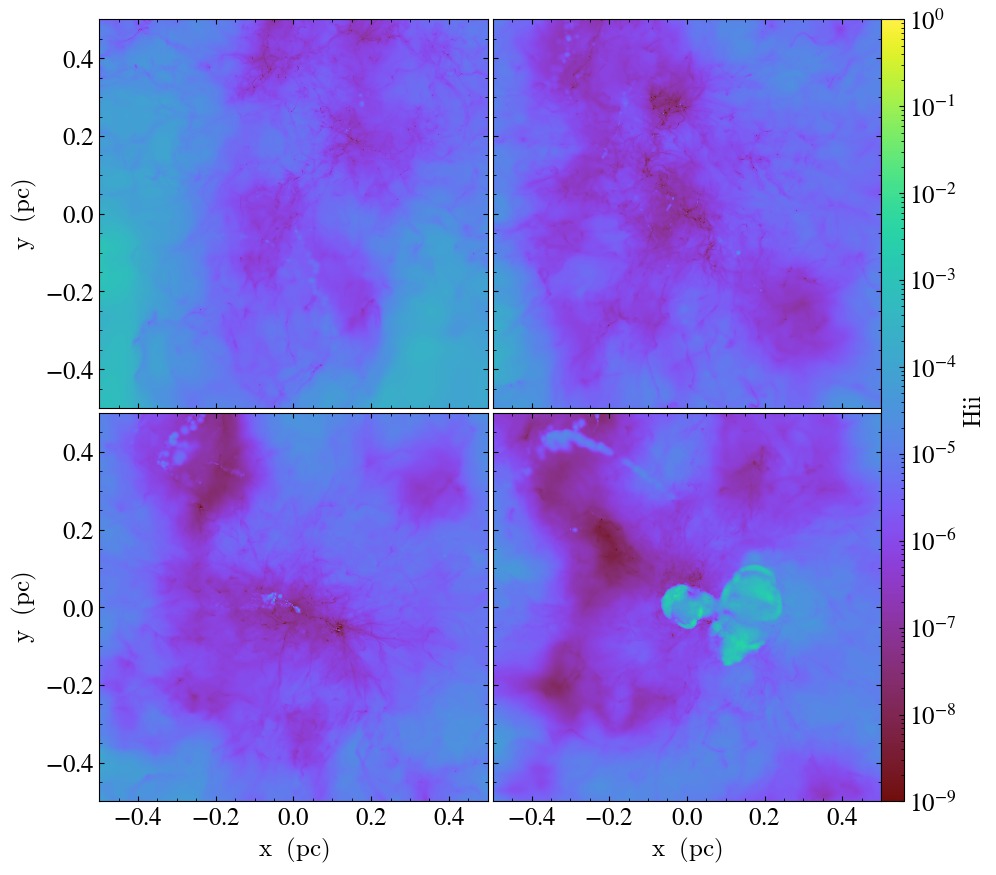

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

import yt

unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}

fns = [
    "../data/snapshot_150.hdf5",
    "../data/snapshot_200.hdf5",
    "../data/snapshot_250.hdf5",
    "../data/snapshot_296.hdf5",
]

fig = plt.figure()
    
grid = AxesGrid(fig,
(0.075, 0.075, 0.85, 0.85),
nrows_ncols=(2, 2),
axes_pad=0.05,
label_mode="L",
share_all=True,
cbar_location="right",
cbar_mode="single",
cbar_size="3%",
cbar_pad="0%",
)

for i, fn in enumerate(fns):
    # Load the data and create a single plot
    ds = yt.load(fn, unit_base = unit_base)  # load data
    ad = ds.all_data()
    MassStar = ad["PartType5", "Masses"].in_units('Msun')
    ParticleID = ad['PartType5', 'ParticleIDs']
    Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
    sort = np.argmax(MassStar)
    Center = Coordinates[sort]
    dir = 2

    left_corner = ds.domain_left_edge.copy()
    right_corner = ds.domain_right_edge.copy()
    
    depth = ds.quan(.1, "pc")
    left_corner[dir] = Center[dir] - 0.5 * depth
    right_corner[dir] = Center[dir] + 0.5 * depth


    region = ds.box(left_corner, right_corner)
    p = yt.ProjectionPlot(ds, "z", ("PartType0", "HII"), width=(1, "pc"), center = Center, weight_field = ('gas', 'density'))
    

    # Ensure the colorbar limits match for all plots
    p.set_zlim(("PartType0", "HII"), 1e-9, 1)

    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots[("PartType0", "HII")]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

    # Finally, this actually redraws the plot.
    p.render()
plt.savefig('hii 499 plot')

yt : [INFO     ] 2024-06-14 09:06:54,085 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-06-14 09:06:54,102 Parameters: current_time              = 0.00012483821354781577
yt : [INFO     ] 2024-06-14 09:06:54,102 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-06-14 09:06:54,102 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-14 09:06:54,103 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-06-14 09:06:54,103 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-06-14 09:06:54,131 Allocating for 1.214e+07 particles
Loading particle index: 100%|█████████████████| 47/47 [00:00<00:00, 3964.53it/s]
yt : [INFO     ] 2024-06-14 09:06:54,359 xlim = 3.521577 4.521577
yt : [INFO     ] 2024-06-14 09:06:54,359 ylim = 3.129129 4.129129
yt : [INFO     ] 2024-06-14 09:06:54,360 xlim = 3.521577 4.521577
yt : [INFO     ] 2024-06-14 09:06:54,36

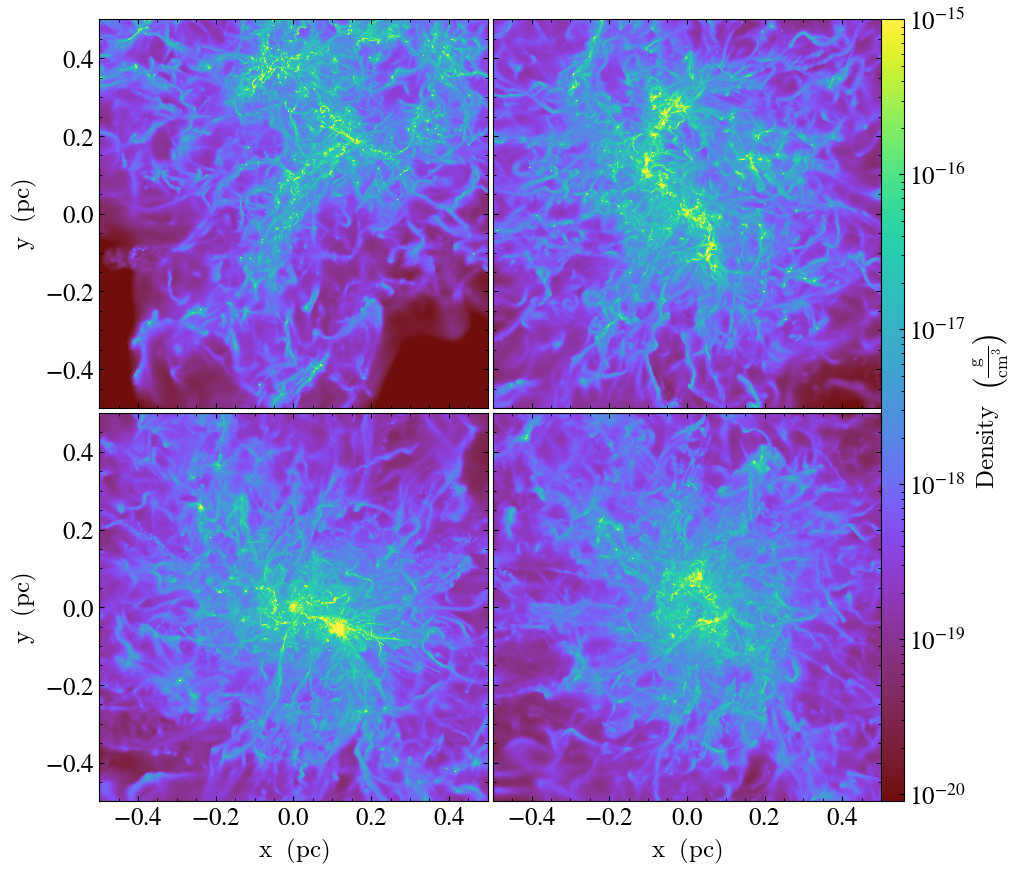

In [4]:
fig = plt.figure()
    
grid = AxesGrid(fig,
(0.075, 0.075, 0.85, 0.85),
nrows_ncols=(2, 2),
axes_pad=0.05,
label_mode="L",
share_all=True,
cbar_location="right",
cbar_mode="single",
cbar_size="3%",
cbar_pad="0%",
)

for i, fn in enumerate(fns):
    # Load the data and create a single plot
    ds = yt.load(fn, unit_base = unit_base)  # load data
    ad = ds.all_data()
    MassStar = ad["PartType5", "Masses"].in_units('Msun')
    ParticleID = ad['PartType5', 'ParticleIDs']
    Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
    sort = np.argmax(MassStar)
    Center = Coordinates[sort]
    dir = 2

    left_corner = ds.domain_left_edge.copy()
    right_corner = ds.domain_right_edge.copy()
    
    depth = ds.quan(.1, "pc")
    left_corner[dir] = Center[dir] - 0.5 * depth
    right_corner[dir] = Center[dir] + 0.5 * depth


    region = ds.box(left_corner, right_corner)
    p = yt.ProjectionPlot(ds, "z", ("gas", "density"), width=(1, "pc"), center = Center, weight_field = ('gas', 'density'))
    

    # Ensure the colorbar limits match for all plots
    p.set_zlim(("gas", "density"), 1e-15, 1e-20)

    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots[("gas", "density")]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

    # Finally, this actually redraws the plot.
    p.render()

plt.savefig('499 density plots')